<a href="https://colab.research.google.com/github/Gregory-crypto/transcriptome-analysis/blob/main/3_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparation steps

Install rpy2, packages & dataset

In [1]:
# Загрузка R magic
%load_ext rpy2.ipython

# Установка нужных пакетов
!Rscript -e 'install.packages("fitdistrplus", repos="https://cloud.r-project.org")'

# Загрузка датасета
!gdown --id 1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/fitdistrplus_1.1-11.tar.gz'
Content type 'application/x-gzip' length 1551868 bytes (1.5 MB)
downloaded 1.5 MB

* installing *source* package ‘fitdistrplus’ ...
** package ‘fitdistrplus’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fitdistrplus)

The downloaded source packages are in
	‘/tmp/RtmpVKeulu/downloaded_packages’
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be r

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Настройка отображения
plt.rcParams["figure.dpi"] = 100

In [ ]:
# Прочтение датасета
df = pd.read_csv("LUAD_counts.tsv", sep="\t")
df.index = [gene.split(".")[0] for gene in df.gene_name]
del df["gene_name"]
df = df.T

In [ ]:
df.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ACTL10,AC119733,AC020765,AC010980,AC004233,AL451106,AC008763,AC006486,AL391628,AP006621
sample_0,4275,0,1071,630,542,372,10445,6760,31744,2022,...,0,0,0,11,0,0,0,0,6,10
sample_1,1536,0,765,510,172,911,4290,1097,807,1043,...,0,0,0,15,1,0,1,0,6,9
sample_2,5009,13,2731,919,321,2299,9368,3812,2704,2496,...,0,0,0,36,2,0,0,0,15,18
sample_3,1889,0,1941,548,301,879,5994,2310,2552,1332,...,0,0,1,17,0,0,0,0,3,22
sample_4,1329,0,1395,297,320,387,6215,3142,685,1676,...,0,0,0,9,3,0,0,0,2,9


## Maximal likelihood of gene data

<Axes: ylabel='Count'>

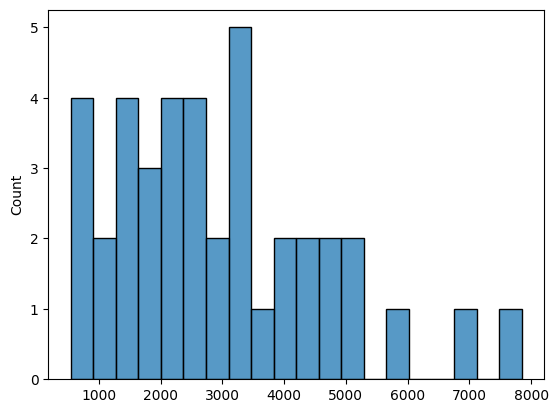

In [ ]:
gene = "TSPAN6"
expr = np.array(df[gene])
sns.histplot(expr, bins=20)

In [ ]:
sampled_columns = df.sample(n = 10, axis = 1)
sampled_columns

,SAMD9,PDE1A,SLC16A6,AP5B1,STX6,GALNS,NCALD,TCF12,DCDC2,SRP14
sample_0,1239,626,34,3460,2236,1437,105,1989,351,11593
sample_1,919,348,176,1154,2349,544,520,2168,34,5527
sample_2,1021,576,213,2472,3831,2096,1113,3295,143,15153
sample_3,1715,496,199,1275,1850,1262,783,4098,15,7689
sample_4,5519,193,61,1400,2322,925,376,2738,25,5610
sample_5,1003,157,117,1635,1887,803,784,5992,380,6799
sample_6,576,28,83,1131,1456,609,642,659,218,6840
sample_7,1312,153,397,1655,1234,741,1035,2474,362,4691
sample_8,840,165,115,2901,5675,2091,651,3746,120,18472
sample_9,405,104,25,2075,3099,1785,2482,4318,793,11138


In [ ]:
list_of_dist = ["norm", "nbinom", "lnorm"]

# , "pois", "nbinom", "lnorm"


In [31]:
%%R
library(fitdistrplus)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
%%R -i sampled_columns,list_of_dist


data <- as.matrix(sampled_columns)
dist <- as.vector(list_of_dist)

aic_matrix <- matrix(NA, nrow = length(colnames(data)), ncol = length(dist))

# Compute the AIC for each distribution and each column of the data
for (i in 1:length(dist)) {
  aic_matrix[, i] <- apply(data, 2, function(x) fitdist(x, distr = toString(dist[i]))$aic)
}

aic_matrix

# data <- as.matrix(sampled_columns)
# dist <- as.vector(list_of_dist)

# fit <- fitdist(data[, 2], distr = toString(dist[4]))$aic
# print(fit)

# aic_matrix <- matrix(NA, ncol = length(colnames(data)), nrow = length(dist))

# for (j in 1:length(colnames(data))) {
#   for (i in 1:length(dist)) {
#     aic_matrix[i, j] <- fitdist(data[, j], distr = toString(dist[i]))$aic
#       # aic_matrix <- lapply(data, function(x) fitdist(x, distr = dist[i])$aic)
#   }
#   }

# aic_matrix



/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


          [,1]     [,2]     [,3]
 [1,] 736.1815 678.6828 670.8343
 [2,] 526.2916 513.9217 515.2714
 [3,] 490.4642 476.3452 478.7712
 [4,] 665.5111 659.3436 659.3773
 [5,] 712.1470 701.7412 700.6806
 [6,] 665.5829 648.4739 646.6587
 [7,] 678.7505 646.7758 645.0552
 [8,] 710.0814 707.2450 709.9617
 [9,] 585.4988 543.6062 550.5682
[10,] 768.2460 764.3542 764.5401


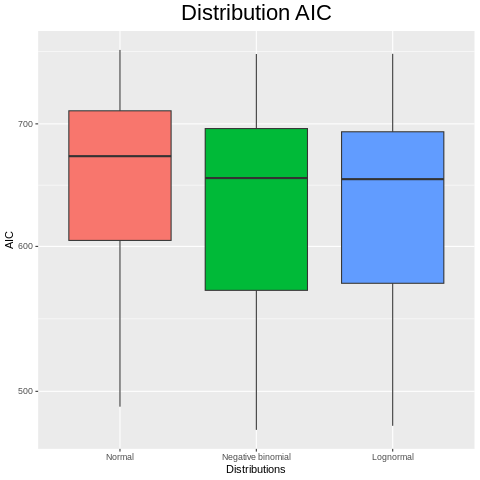

In [ ]:
%%R

dat <- stack(as.data.frame(aic_matrix))
dat
ggplot(dat) +
  geom_boxplot(aes(x = ind, y = values, fill = ind)) +
  scale_y_log10() +
  labs(title = "Distribution AIC",
  x = "Distributions", y = "AIC", fill = "Distribution") +
  theme(legend.position = "none",
  plot.title = element_text(size = rel(2), hjust = 0.5)) +
    scale_x_discrete(breaks = c("V1", "V2", "V3"),
                   labels =  c("Normal", "Negative binomial", "Lognormal"))

The best result is show for the negative binomial distribution and lognormal

## Distribution analysis of technical replicates

Скачайте датасет <code>1M8-86VecaYPERovPk4JKhT2lLa4PfJxi</code> из статьи <a href="https://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-13-304#Sec8">Oberg et al., 2012</a>. Внимательно прочитайте статью и изучите дизайн эксперимента &mdash; какие реплики в статье называют техническими, а какие &mdash; биологическими? Правда ли в технических репликах наблюдается распределение Пуассона?

In [19]:
# Dataset download
!gdown 1M8-86VecaYPERovPk4JKhT2lLa4PfJxi

Downloading...
From: https://drive.google.com/uc?id=1M8-86VecaYPERovPk4JKhT2lLa4PfJxi
To: /content/GSE29022_gene_counts.txt
100% 2.76M/2.76M [00:00<00:00, 131MB/s]


According to the article, technical replicates are samples that are processed in parallel using the same RNA source, while biological replicates are samples that are derived from different individuals or cell cultures

In [51]:
df2 = pd.read_csv("GSE29022_gene_counts.txt", sep="\t").T
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,17343,17344,17345,17346,17347,17348,17349,17350,17351,17352
sample4019.flowcell30WPLAAXX.lane5,785,527,3,117,30,14,1,1799,46,50,...,103,0,6,49,0,20,165,0,25,220
sample4019.flowcell30WPLAAXX.lane6,761,501,2,129,30,11,3,1873,43,37,...,102,0,9,50,0,15,196,0,30,218
sample6045.flowcell30WP5AAXX.lane1,794,466,3,80,19,0,6,1813,48,25,...,181,0,16,53,0,8,214,0,32,169
sample6045.flowcell30WP5AAXX.lane2,888,581,1,71,34,3,6,1962,64,23,...,219,0,26,59,0,16,205,0,18,162
sample2550.flowcell305TMAAXX.lane3,873,259,1,61,16,8,0,1778,39,5,...,118,0,11,17,0,10,115,0,38,169


In [22]:
df2.shape

(47, 17353)

In [54]:
sampled_columns2 = df2.sample(n = 1000, axis = 1).iloc[0:2, :]
sampled_columns2

,16902,5338,15186,8650,10244,12775,13316,8731,8317,15623,...,10772,13546,14692,16774,13485,648,966,4260,8401,4095
sample4019.flowcell30WPLAAXX.lane5,0,103,540,193,0,0,179,2,120,2,...,866,0,115,0,0,184,529,590,137,21
sample4019.flowcell30WPLAAXX.lane6,0,90,512,200,0,0,164,0,114,1,...,908,1,123,0,0,182,593,657,162,13


In [55]:
list_of_dist = ["norm", "nbinom", "pois"]

In [56]:
%%R -i sampled_columns2,list_of_dist


data <- as.matrix(sampled_columns)
dist <- as.vector(list_of_dist)

aic_matrix <- matrix(NA, nrow = length(colnames(data)), ncol = length(dist))

# Compute the AIC for each distribution and each column of the data
for (i in 1:length(dist)) {
  aic_matrix[, i] <- apply(data, 2, function(x) fitdist(x, distr = toString(dist[i]))$aic)
}


/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


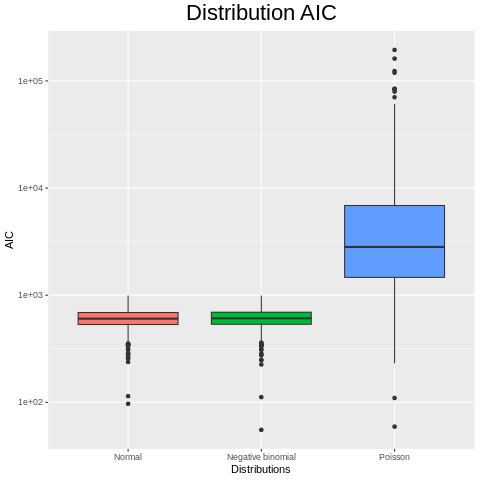

In [57]:
%%R

dat <- stack(as.data.frame(aic_matrix))
dat
ggplot(dat) +
  geom_boxplot(aes(x = ind, y = values, fill = ind)) +
  scale_y_log10() +
  labs(title = "Distribution AIC",
  x = "Distributions", y = "AIC", fill = "Distribution") +
  theme(legend.position = "none",
  plot.title = element_text(size = rel(2), hjust = 0.5)) +
    scale_x_discrete(breaks = c("V1", "V2", "V3"),
                   labels =  c("Normal", "Negative binomial", "Poisson"))

Проделайте подобную процедуру с каунтами генов, которые вы получили в результате анализа <a href="https://www.nature.com/articles/s41598-018-23226-4">статьи</a> со сравнением методов подготовки библиотек для scRNA-Seq (`1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek`). Разберитесь, что в случае этой работы называют технической репликой. Актуально ли распределение Пуассона в случае таких технических реплик?

In [59]:
# Dataset download
!gdown 1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek

Downloading...
From: https://drive.google.com/uc?id=1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek
To: /content/polyA_total_counts.tsv
100% 1.87M/1.87M [00:00<00:00, 142MB/s]


In [60]:
df3 = pd.read_csv("polyA_total_counts.tsv", sep="\t", index_col = 0).T
df3.head()

,MAFIP,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,...,PRY,BPY2,DAZ1,DAZ2,CDY1B,BPY2B,DAZ3,DAZ4,BPY2C,CDY1
colon_polyA_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,148,0,0,0,0
colon_polyA_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_polyA_1,0,0,0,0,0,0,0,0,0,0,...,0,26,0,0,0,0,0,0,63,0
colon_polyA_2,0,0,0,0,0,0,0,0,0,0,...,0,0,74,0,0,0,0,0,0,0
colon_total_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
sampled_columns3 = df3.sample(n = 10, axis = 1).iloc[0:4, :]
sampled_columns3

,PCDH9,ERVFRD-1,KIF23,FBXL3,EXOC6,BHLHE22,FOXO1,ANKK1,UCHL1,ZNF3
colon_polyA_3,24866,4556,20800,303216,57233,909,90110,378,12552,119181
colon_polyA_4,27426,3683,18321,302664,64316,530,89316,71,10509,107552
colon_polyA_1,20524,2785,18576,278649,57120,379,88203,692,9369,122212
colon_polyA_2,27049,3984,19517,309478,65961,979,92973,75,10147,118497


In [62]:
%%R -i sampled_columns,list_of_dist


data <- as.matrix(sampled_columns)
dist <- as.vector(list_of_dist)

aic_matrix <- matrix(NA, nrow = length(colnames(data)), ncol = length(dist))

# Compute the AIC for each distribution and each column of the data
for (i in 1:length(dist)) {
  aic_matrix[, i] <- apply(data, 2, function(x) fitdist(x, distr = toString(dist[i]))$aic)
}

aic_matrix

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


          [,1]     [,2]      [,3]
 [1,] 125.6747 114.8113  112.8111
 [2,] 581.4172 587.0480 2015.3250
 [3,] 441.5878 444.5343  721.9840
 [4,] 448.5581 447.4608  810.7242
 [5,] 457.5764 461.3271  756.2077
 [6,] 575.6921 579.2726 2036.2011
 [7,] 522.2328 528.6951 1294.1608
 [8,] 504.5466 539.8258 1610.8382
 [9,] 584.0042 573.0460 3608.6142


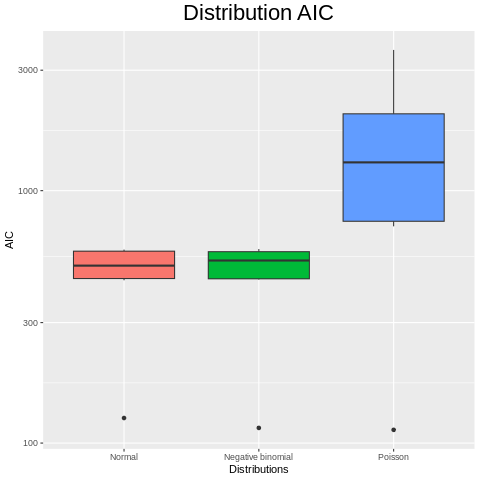

In [64]:
%%R

dat <- stack(as.data.frame(aic_matrix))
dat
ggplot(dat) +
  geom_boxplot(aes(x = ind, y = values, fill = ind)) +
  scale_y_log10() +
  labs(title = "Distribution AIC",
  x = "Distributions", y = "AIC", fill = "Distribution") +
  theme(legend.position = "none",
  plot.title = element_text(size = rel(2), hjust = 0.5)) +
    scale_x_discrete(breaks = c("V1", "V2", "V3"),
                   labels =  c("Normal", "Negative binomial", "Poisson"))